# Supervised Learning

Linear Regression MSE: 41286555.15
R^2 Score: 0.92


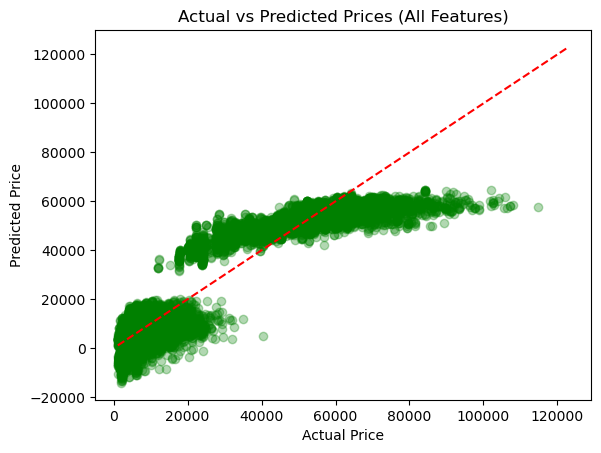

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("./train_clean.csv", parse_dates=["date"])

df["airline"] = df["airline"].astype('category')
df["dep_time"] = df["dep_time"].astype('category')
df["from"] = df["from"].astype('category')
df["stop"] = df["stop"].astype('category')
df["arr_time"] = df["arr_time"].astype('category')
df["to"] = df["to"].astype('category')
df["class"] = df["class"].astype('category')
df["day_of_week"] = df["day_of_week"].astype('category')
df["flight"] = df["flight"].astype('category')

# Drop the 'date' column
df = df.drop(columns=["date"])

# Separate target
y = df["price"]
X = df.drop(columns=["price"])
X = X.drop(columns=["Unnamed: 0"])

# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include="category").columns
numerical_cols = X.select_dtypes(exclude="category").columns

# One-Hot Encode categorical columns
X_categorical = pd.get_dummies(X[categorical_cols], drop_first=True)

# Combine numerical and encoded categorical features
X_final = pd.concat([X[numerical_cols], X_categorical], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.3, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (All Features)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


c:\Users\wikmgg\AppData\Local\miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Best Polynomial Degree: 2
Polynomial Regression MSE: 41343068.88
R^2 Score: 0.92


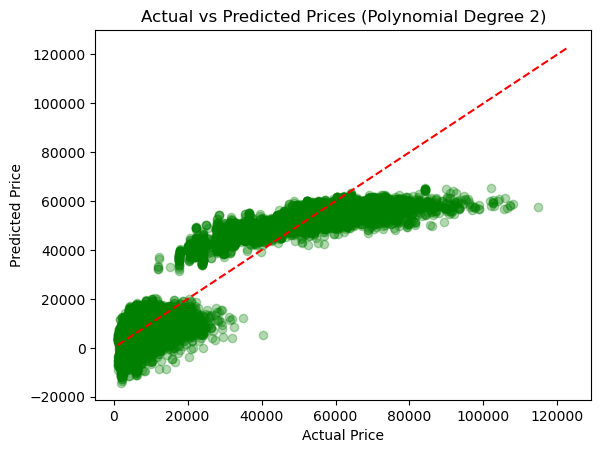

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Separate target and features
y = df["price"]
X = df.drop(columns=["price", "Unnamed: 0"])

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include="category").columns.tolist()
numerical_cols = X.select_dtypes(exclude="category").columns.tolist()

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", PolynomialFeatures(include_bias=False), numerical_cols),
        ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# Create pipeline: preprocessing + linear regression
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Define grid search parameters (only polynomial degree)
param_grid = {
    "preprocessor__num__degree": [2, 3 , 4]
}

# Run grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X, y)

# Retrieve best model and degree
best_model = grid_search.best_estimator_
best_degree = grid_search.best_params_["preprocessor__num__degree"]

# Final train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best Polynomial Degree: {best_degree}")
print(f"Polynomial Regression MSE: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.3, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Prices (Polynomial Degree {best_degree})")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.9912280701754386
Classification Report:
               precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        43
      benign       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



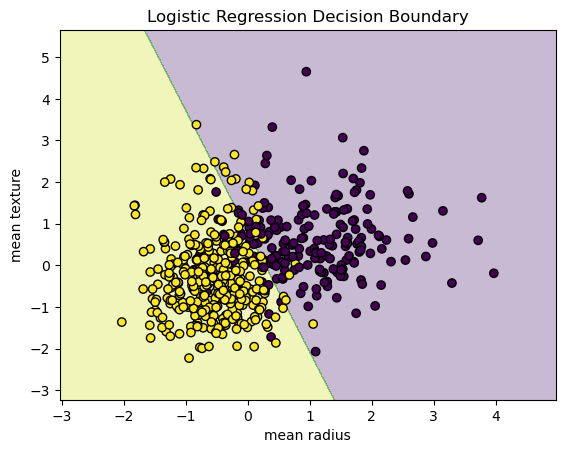

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Grid Search for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver' : ["liblinear"]
}
model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# Plot decision boundary for two features
X_plot = X_scaled[:, [0, 1]]  # First two features
X_train_plot, X_test_plot = train_test_split(X_plot, test_size=0.2, random_state=42)
model_plot = LogisticRegression(**grid_search.best_params_, max_iter=1000)
model_plot.fit(X_train_plot, y_train)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

SVC(kernel='linear')

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVC accuracy : {accuracy * 100:.2f}%")



SVC accuracy : 96.67%


Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Decision Tree Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.91      0.93        43
      benign       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



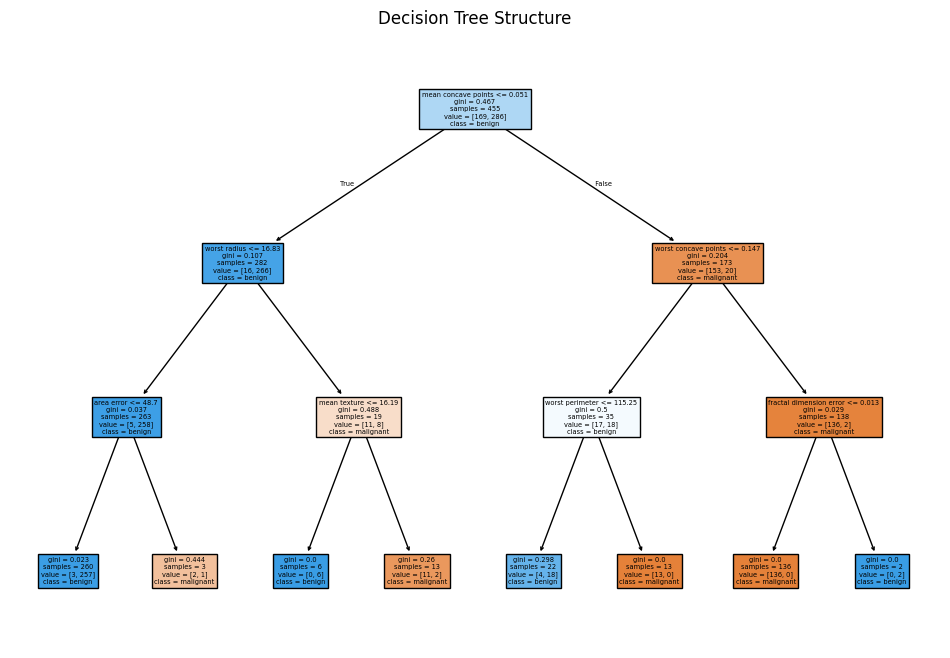

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Search for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}
model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# Plot tree
plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title('Decision Tree Structure')
plt.show()

# Unsupervised Learning

## Load Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine, load_digits, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

## Clustering

## K-Means

In [ ]:
iris = load_iris()
print(iris.target_names)
print(iris.feature_names)

iris_train = iris.data[:, [0, 2]]

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


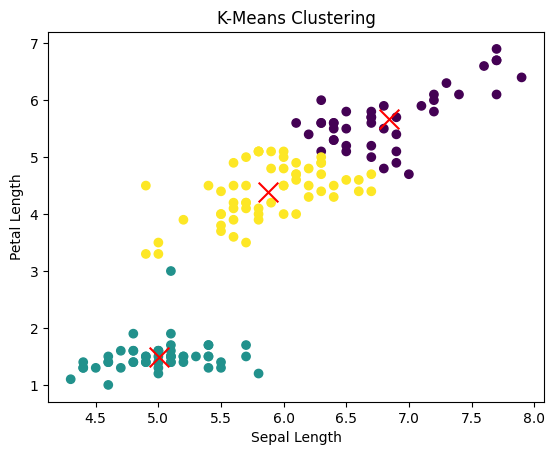

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_train)

plt.scatter(iris_train[:, 0], iris_train[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='x')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('K-Means Clustering')
plt.show()

## K-Means Applications

### Color Segmentation

In [74]:
from matplotlib.image import imread
image = imread("nature.jpeg")
image.shape

(1707, 2560, 3)

In [77]:
X = image.reshape(-1, 3)

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.astype(np.uint8)
    segmented_imgs.append(segmented_img.reshape(image.shape))

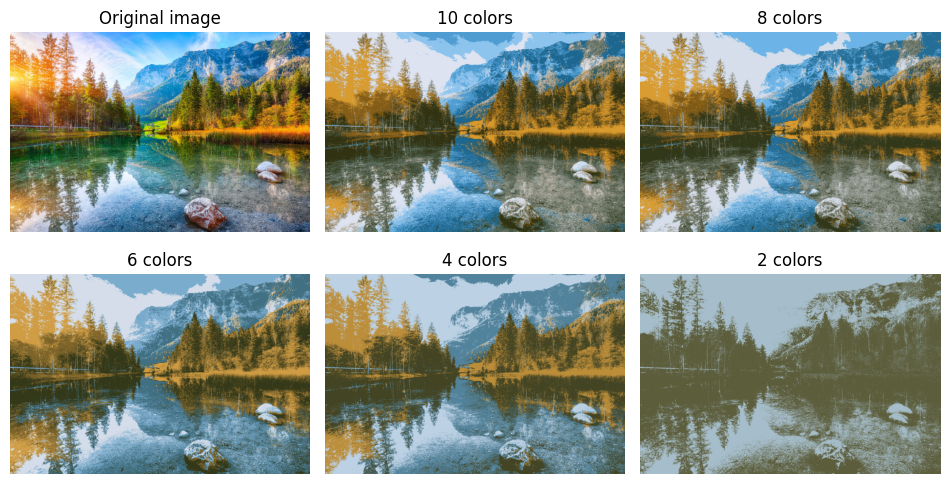

In [84]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

## Dimensionality Reduction

## PCA

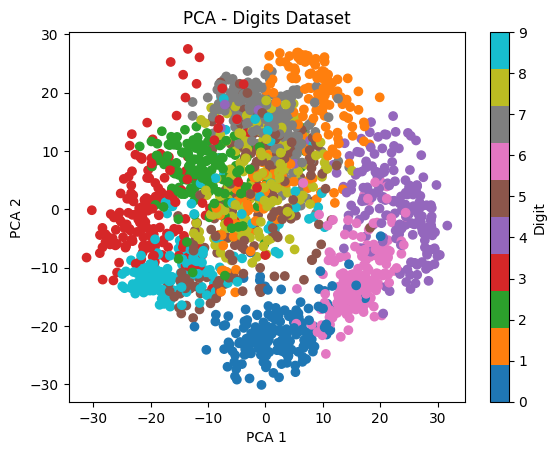

In [11]:
digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA - Digits Dataset')
plt.colorbar(label='Digit')
plt.show()